# Overall Ratings 
### Used one data file - Hospital overall rating 

+-----------------------+-----+
|Hospital_overall_rating|COUNT|
+-----------------------+-----+
|                      3| 1186|
|                      4| 1154|
|          Not Available| 1110|
|                      2|  752|
|                      5|  336|
|                      1|  260|
+-----------------------+-----+



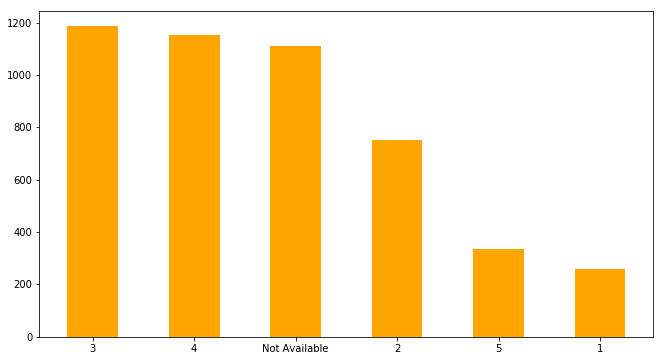

In [1]:
# %pylab osx
import os
import sys
from pyspark import SparkContext
from matplotlib.pylab import *
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
%matplotlib inline

spark = SparkSession \
    .builder \
    .appName("hospital rating") \
    .getOrCreate()
        
df = spark.read.load("/Users/seankeefe/Desktop/Hospital_General_Information.csv", 
                     format="csv", sep=",", inferSchema="true", header="true")
#df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('/Users/seankeefe/Desktop/Hospital_General_Information.csv')

#print(type(df))
df.registerTempTable('Mytable')
groupByCount = spark.sql("SELECT Hospital_overall_rating, COUNT(Hospital_overall_rating) AS COUNT FROM Mytable GROUP BY Hospital_overall_rating order by count(Hospital_overall_rating) DESC ")
groupByCount.show()

_dataList = groupByCount.collect()
x_axis = []
y_axis = []

for i in range(len(_dataList)):
    x_axis.append(_dataList[i][0])
    y_axis.append(_dataList[i][1])

pos = np.arange(len(x_axis))

ax = plt.axes()
ax.set_xticks(pos)
ax.set_xticklabels(x_axis)

plt.bar(pos, y_axis, 0.5, color='orange')
plt.xticks(rotation= 0)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(11, 6)

def onclick(event):
    print('button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          (event.button, event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)
